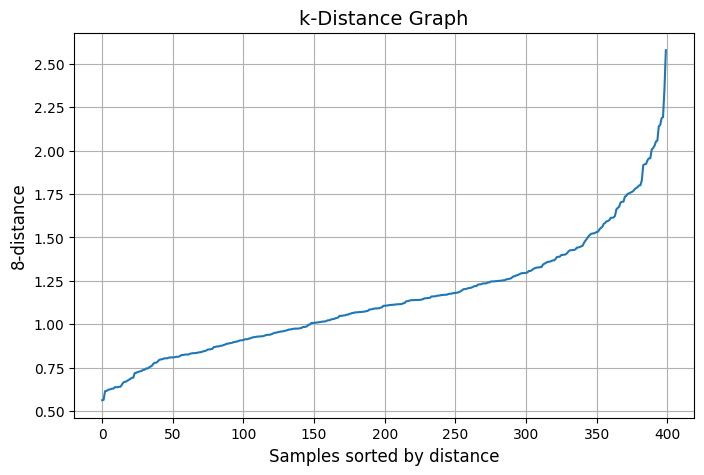

聚类结果已保存到: ..\temp\DBSCAN聚类.csv


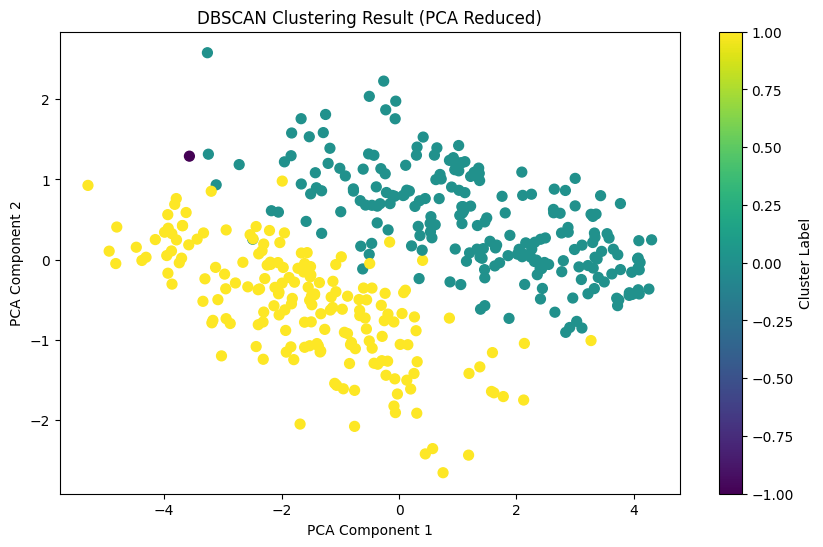

聚类统计信息:
Cluster
-1      1
 0    218
 1    181
dtype: int64


In [42]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# 加载数据
file_path = '..\\data\\Admission_Predict.csv'
df = pd.read_csv(file_path)

# 数据预处理（标准化特征数据）
def preprocess_data(df):
    data = df.iloc[:, 1:-1]  # 第1列（Serial_No.）和最后一列（目标列）不计入聚类
    scaler = StandardScaler()  # Z-Score 标准化
    normalized_data = scaler.fit_transform(data)
    return normalized_data, df['Serial_No.']

# 绘制 k-距离图确定合适的 eps
def plot_k_distance(data, min_pts=8):
    neighbors = NearestNeighbors(n_neighbors=min_pts)
    neighbors_fit = neighbors.fit(data)
    distances, _ = neighbors_fit.kneighbors(data)
    distances = np.sort(distances[:, min_pts - 1])  # 第 min_pts 个最近距离
    plt.figure(figsize=(8, 5))
    plt.plot(distances)
    plt.xlabel('Samples sorted by distance', fontsize=12)
    plt.ylabel(f'{min_pts}-distance', fontsize=12)
    plt.title('k-Distance Graph', fontsize=14)
    plt.grid()
    plt.show()

# 执行 DBSCAN 聚类
def perform_dbscan(data, eps=2.00, min_samples=8):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    return labels

# 可视化聚类结果（降维到 2D）
def visualize_clusters(data, labels):
    pca = PCA(n_components=2)  # PCA 降维到 2D
    reduced_data = pca.fit_transform(data)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50)
    plt.colorbar(scatter, label='Cluster Label')
    plt.title("DBSCAN Clustering Result (PCA Reduced)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# 主程序
normalized_data, ids = preprocess_data(df)

# 步骤 1: 绘制 k-距离图以确定 eps
plot_k_distance(normalized_data, min_pts=8)

# 步骤 2: 设置合理的 eps 和 MinPts 执行 DBSCAN
labels = perform_dbscan(normalized_data, eps=2.00, min_samples=8)

# 将聚类结果添加回原数据
df['Cluster'] = labels

# 输出聚类结果
output_path = '..\\temp\\DBSCAN聚类.csv'
df.to_csv(output_path, index=False)
print(f"聚类结果已保存到: {output_path}")

# 可视化聚类结果
visualize_clusters(normalized_data, labels)

# 查看每个聚类的统计信息
cluster_stats = df.groupby('Cluster').size()
print("聚类统计信息:")
print(cluster_stats)


In [43]:
# 按照聚类标签进行分组，并计算均值
cluster_means = df.groupby('Cluster').mean()

# 查看均值
print(cluster_means)
# 将聚类得到的各个类的各个特征的均值写入csv文件
cluster_means.to_csv('..\\temp\\DBSCAN分析.csv')

         Serial_No.   GRE_Score  TOEFL_Score  University_Rating       SOP  \
Cluster                                                                     
-1        59.000000  300.000000    99.000000           1.000000  3.000000   
 0       194.490826  322.958716   110.160550           3.564220  3.809633   
 1       208.519337  309.491713   104.143646           2.524862  2.908840   

              LOR      CGPA  Research  Chance_of_Admit  
Cluster                                                 
-1       2.000000  6.800000       1.0         0.360000  
 0       3.784404  8.890917       1.0         0.797982  
 1       3.060773  8.257182       0.0         0.637680  
